<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.version

'3.6.8 (v3.6.8:3c6b436a57, Dec 24 2018, 02:04:31) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

In [2]:
# %load_ext watermark
# %watermark -v -p numpy, scipy, sklearn, pandas, matplotlib

In [3]:
### 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

### 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# 한글출력
matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

### 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# SciPy 이슈 #5998에 해당하는 경고를 무시합니다(https://github.com/scipy/scipy/issues/5998).
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
# OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita) 데이터를 합하기
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
import os, sys
datapath = os.path.join("../datasets", "lifesat", "")       # '../datasets/lifesat/'

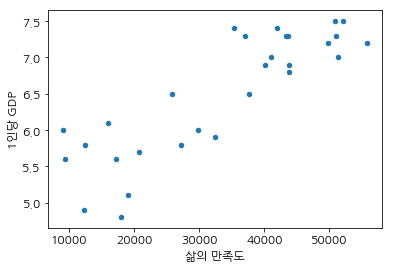

[[5.96242338]]


In [6]:
# 샘플 코드
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
ax = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
ax.set(xlabel="삶의 만족도", ylabel="1인당 GDP")
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과 [[ 5.96242338]]

In [7]:
# 선형 회귀 모델을 k-최근접 이웃 회귀 모델로 교체할 경우
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
knn.fit(X, y)

# 키프로스에 대한 예측
print(knn.predict(X_new)) # 결과 [[ 5.76666667]]

[[5.76666667]]
